# Representación de los datos del covid-19 en Colombia y en BOGOTÁ

## 1. Preparación de los paquetes y los datos.
### 1.1 Importe de paquetes necesarios

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import sqlite3 as sql
import ogr
import unidecode
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

### 1.2 Conexión con la base de datos

In [2]:
database_name = "datasets/covid.db"
conn = sql.connect(database_name)
print(f'database connected {sql.version}')

database connected 2.6.0


## 2. Extracción y representacion de los datos de covid-19 en Colombia

### 2.1 Consulta a la base de datos de el número de contagios por departamento

In [3]:
table_name = 'covidt'
query = f"select departamento , count(*) as total from {table_name}  GROUP BY departamento ORDER BY total DESC"
data_departamentos = pd.read_sql(query, conn)
data_departamentos.head()

,departamento,total
0,BOGOTA,321596
1,ANTIOQUIA,169425
2,VALLE,83342
3,CUNDINAMARCA,42455
4,SANTANDER,42328


### 2.2 Lectura y muestra del mapa de Colombia

<AxesSubplot:>

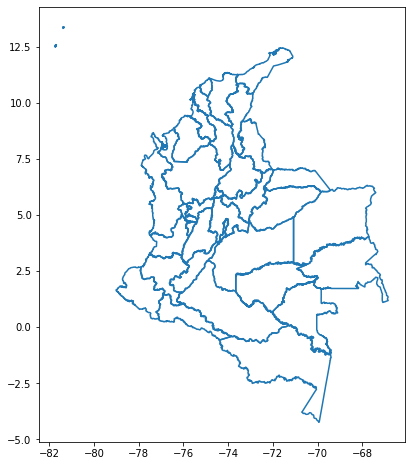

In [4]:
map_col = gpd.read_file('datasets/departamentos_colombia1.geojson')
map_col.boundary.plot()

### 2.3 Union de los datos del mapa y los de covid
tambien se guardan en la base de datos en una nueva tabla

In [5]:
# deps_accent = map_col['departamento'].tolist()
# for i in range(len(deps_accent)):
#     if deps_accent[i]:
#         deps_accent[i] = unidecode.unidecode(deps_accent[i])
#     else:
#         deps_accent[i] = deps_accent[i]

# map_col['departamento'] = deps_accent
# map_col
map_covid_col = map_col.merge(data_departamentos, on='departamento', how='outer')
map_covid_col.head()

,cartodb_id,pais,departamento,n_universidades,geometry,total
0,1.0,Colombia,AMAZONAS,1.0,"MULTIPOLYGON (((-71.29209 0.06823, -71.28826 0...",2908.0
1,19.0,Colombia,GUAJIRA,1.0,"MULTIPOLYGON (((-71.66677 12.45822, -71.66662 ...",10060.0
2,2.0,Colombia,ANTIOQUIA,16.0,"MULTIPOLYGON (((-76.40313 8.85156, -76.40290 8...",169425.0
3,34.0,None,None,NaN,None,NaN
4,3.0,Colombia,ARAUCA,0.0,"MULTIPOLYGON (((-70.67672 7.09265, -70.67667 7...",3347.0


### 2.4 Grafica de COVID-19 en Colombia por departamentos

<AxesSubplot:>

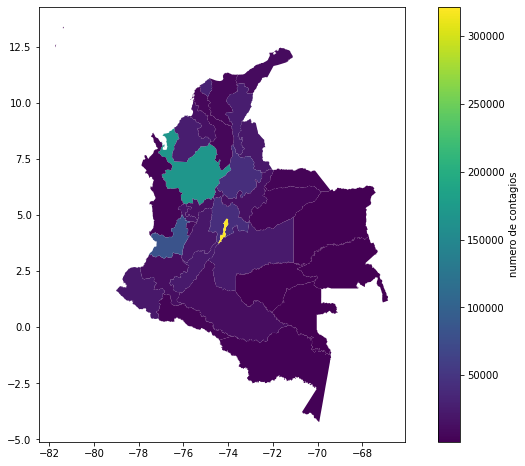

In [6]:
fig, ax = plt.subplots(1, 1)
map_covid_col.plot(column='total', ax=ax, legend=True, legend_kwds={'label': "numero de contagios"})